<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/ps2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set Up

all code adapted/copied from map.ipynb by The AOK

In [3]:
!pip install geopandas==1.0.1

In [4]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [5]:
gpd.__version__

'1.0.1'

In [6]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.4 MB/s eta 0:00:00


#Germany Map Revised



In [ ]:
#Shapefile of counties from https://data.opendatasoft.com/explore/dataset/georef-germany-kreis%40public/export/?disjunctive.lan_code&disjunctive.lan_name&disjunctive.krs_code&disjunctive.krs_name&disjunctive.krs_name_short
! wget -q -O germany_counties.zip https://docs.google.com/uc?id=12_vFQomIzk5D9VpAgsf8aeBpl5ONXfij&export=download

zip_ref = zipfile.ZipFile('germany_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger0=gpd.read_file('georef-germany-kreis-millesime.shp')

<Axes: >

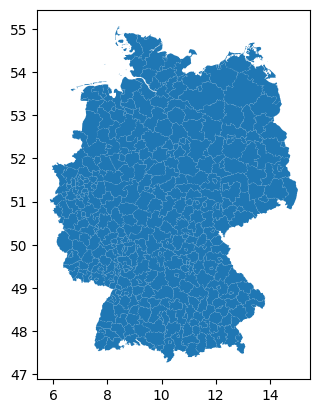

In [ ]:
ger0.plot()

In [ ]:
#importing data on foreign born population in Germany from https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/
gerfb=pd.read_excel('https://docs.google.com/uc?id=1V6ZoC0HvmVnGKbnXj98IE3QvCKNKNFfg&export=download')

In [ ]:
gerfb.head(10)

,Statistik_Code,Statistik_Label,Stichtag,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl,Geschlecht_Maennlich_Anzahl,Geschlecht_Weiblich_Anzahl,Staatsangehoerigkeit_EU-Staaten_Anzahl,Staatsangehoerigkeit_EU-Drittstaaten_Anzahl,Alter_unter_6_Anzahl,Alter_6_und_mehr_Anzahl,Alter_unter_18_Anzahl,Alter_18_und_mehr_Anzahl,Alter_unter_15_Anzahl,Alter_15_bis_unter_65_Anzahl,Alter_65_und_mehr_Anzahl
0,12521,Auslaenderstatistik,31.12.2023,Deutschland ...,Kein_AGS ...,13895865,7305525,6590340,5113875,8781990,748770,13147095,2360060,11535805,1971880,10668475,1255510
1,12521,Auslaenderstatistik,31.12.2023,Schleswig-Holstein ...,Kein_AGS ...,346690,181990,164700,107365,239325,22015,324675,70625,276065,58630,259355,28705
2,12521,Auslaenderstatistik,31.12.2023,Flensburg_Stadt ...,01001 ...,19020,10310,8710,8005,11015,1335,17685,3800,15225,3120,14530,1370
3,12521,Auslaenderstatistik,31.12.2023,Kiel_Stadt ...,01002 ...,36755,18990,17770,7715,29040,2420,34340,7295,29460,6090,27605,3060
4,12521,Auslaenderstatistik,31.12.2023,Luebeck_Stadt ...,01003 ...,31770,16370,15400,9160,22610,1715,30060,5530,26240,4600,23910,3265
5,12521,Auslaenderstatistik,31.12.2023,Neumuenster_Stadt ...,01004 ...,14760,8005,6750,4955,9805,1010,13750,3230,11530,2685,11085,990
6,12521,Auslaenderstatistik,31.12.2023,Dithmarschen ...,01051 ...,12520,6735,5785,4430,8090,985,11535,3100,9420,2585,9240,700
7,12521,Auslaenderstatistik,31.12.2023,Herzogtum_Lauenburg ...,01053 ...,22710,11820,10890,7100,15610,1485,21225,5025,17685,4150,16770,1790
8,12521,Auslaenderstatistik,31.12.2023,Nordfriesland ...,01054 ...,17795,9265,8530,6765,11025,1200,16595,3685,14110,3085,13450,1255
9,12521,Auslaenderstatistik,31.12.2023,Ostholstein ...,01055 ...,17445,9035,8410,5600,11845,1015,16430,3495,13950,2850,13190,1400


In [ ]:
gerfb1=gerfb[['Region', 'AGS_Kreis', 'Geschlecht_Insgesamt_Anzahl']]

In [ ]:
gerfb1.head(5)

,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl
0,Deutschland ...,Kein_AGS ...,13895865
1,Schleswig-Holstein ...,Kein_AGS ...,346690
2,Flensburg_Stadt ...,01001 ...,19020
3,Kiel_Stadt ...,01002 ...,36755
4,Luebeck_Stadt ...,01003 ...,31770


In [ ]:
gerfb2 = gerfb1.rename(columns={'AGS_Kreis': 'county_code'})

In [ ]:
gerfb2.columns

Index(['Region', 'county_code', 'Geschlecht_Insgesamt_Anzahl'], dtype='object')

In [ ]:
gerfb2['county_code']=gerfb2['county_code'].str.strip()

In [ ]:
#uploading data for total population per county so I can calculate percentage of foreign born population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
#code to read column with county code as string so it doesn't delete the first 0 from chat gpt
gerpop=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/pop_county_ger.xlsx', dtype={'Schlüssel-nummer': str})

In [ ]:
gerpop.head(5)

,Schlüssel-nummer,Regionale Bezeichnung,Kreisfreie Stadt,NUTS3,Fläche \nin km2,Bevölkerung Insegesamt,männlich,weiblich,je km2
0,NaN,NaN,Kreis / Landkreis,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,3,4,5.00,6.0,7.0,8.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,Schleswig-Holstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01001,Kreisfreie Stadt,"Flensburg, Stadt",DEF01,56.73,92550.0,45874.0,46676.0,1631.0


In [ ]:
gerpop['county_code']=gerpop['Schlüssel-nummer']
gerpop['county_code']=gerpop['county_code'].str.strip()

In [ ]:
gerpop.dtypes

,0
Schlüssel-nummer,object
Regionale Bezeichnung,object
Kreisfreie Stadt,object
NUTS3,object
Fläche \nin km2,float64
Bevölkerung Insegesamt,float64
männlich,float64
weiblich,float64
je km2,float64
county_code,object


In [ ]:
gerpop['county_code']

,county_code
0,NaN
1,1
2,NaN
3,01
4,01001
...,...
468,16073
469,16074
470,16075
471,16076


In [ ]:
#merging total population data with foreign born data and calculating a percentage
merged_gerpop = pd.merge(gerfb2, gerpop, on='county_code', how='outer', indicator=True)
merged_gerpop[['county_code' ,'Geschlecht_Insgesamt_Anzahl', 'Bevölkerung Insegesamt ','_merge']]

,county_code,Geschlecht_Insgesamt_Anzahl,Bevölkerung Insegesamt,_merge
0,01,NaN,NaN,right_only
1,01001,19020.0,92550.0,both
2,01002,36755.0,247717.0,both
3,01003,31770.0,218095.0,both
4,01004,14760.0,79502.0,both
...,...,...,...,...
514,NaN,NaN,992666.0,right_only
515,NaN,NaN,2573135.0,right_only
516,NaN,NaN,1628378.0,right_only
517,NaN,NaN,4086152.0,right_only


In [ ]:
merged_gerpop['percentage foreign born']= merged_gerpop['Geschlecht_Insgesamt_Anzahl'] / merged_gerpop['Bevölkerung Insegesamt '] * 100

In [ ]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry'],
      dtype='object')

In [ ]:
ger0['krs_name']

,krs_name
0,['Landkreis Peine']
1,['Kreisfreie Stadt Leverkusen']
2,['Kreis Ennepe-Ruhr-Kreis']
3,['Kreis Märkischer Kreis']
4,['Landkreis Ahrweiler']
...,...
395,['Landkreis Augsburg']
396,['Landkreis Vorpommern-Rügen']
397,['Landkreis Zwickau']
398,['Landkreis Görlitz']


In [ ]:
ger0['krs_code']

,krs_code
0,['03157']
1,['05316']
2,['05954']
3,['05962']
4,['07131']
...,...
395,['09772']
396,['13073']
397,['14524']
398,['14626']


In [ ]:
#trying to remove square brackets and quotation marks from county codes
#code from https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe
ger0['krs_code'] = ger0['krs_code'].str.strip('[]')
ger0['county_code'] = ger0['krs_code'].str.replace("'", "")

In [ ]:
ger0['county_code']

,county_code
0,03157
1,05316
2,05954
3,05962
4,07131
...,...
395,09772
396,13073
397,14524
398,14626


In [ ]:
#making the county_code column in both data sets floats
ger0['county_code2'] = ger0['county_code'].astype(float)
gerfb2['county_code2'] = pd.to_numeric(gerfb2['county_code'], errors='coerce')

In [ ]:
#making percentage data county codes into floats
merged_gerpop['county_code2'] = pd.to_numeric(merged_gerpop['county_code'], errors='coerce')

In [ ]:
gerfb_percentage = pd.merge(ger0, merged_gerpop, on='county_code2',how='outer',indicator='merge')
gerfb_percentage[['Region','county_code2','merge', 'percentage foreign born']]

gerfb_percentage_final = pd.merge(ger0, merged_gerpop, on='county_code2',how='inner',indicator=False)

,Region,county_code2,merge,percentage foreign born
0,NaN,1.0,right_only,NaN
1,NaN,1.0,right_only,NaN
2,NaN,2.0,right_only,NaN
3,NaN,3.0,right_only,NaN
4,NaN,4.0,right_only,NaN
...,...,...,...,...
514,NaN,NaN,right_only,NaN
515,NaN,NaN,right_only,NaN
516,NaN,NaN,right_only,NaN
517,NaN,NaN,right_only,NaN


<Axes: >

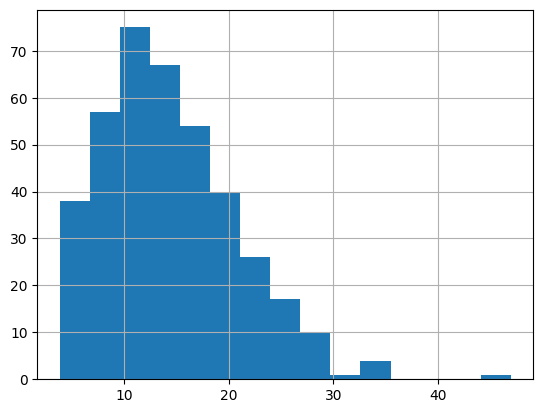

In [ ]:
gerfb_percentage_final['percentage foreign born'].hist(bins=15)

The histogram shows a distribution that is very skewed to the right, with most of counties between 10% and 20% of foreign born population. I chose to stick with 5 classes for this map, to allow to accurately represent the relatively high variety of concentrations. When mapping the map with natural breaks and 5 classes, the last class ended up including all counties which had between 26 and 47% of foreign born people. To avoid such a high interval I decided to manually define the classification and use 10%, 20%, 30%, and 40% as the cutoff points. The resulting map still shows very clearly how the highest percentage of foreign born population is mostly found in what was previously West Germany, and in Berlin.

<Axes: >

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

Text(14.5, 53, 'Berlin')

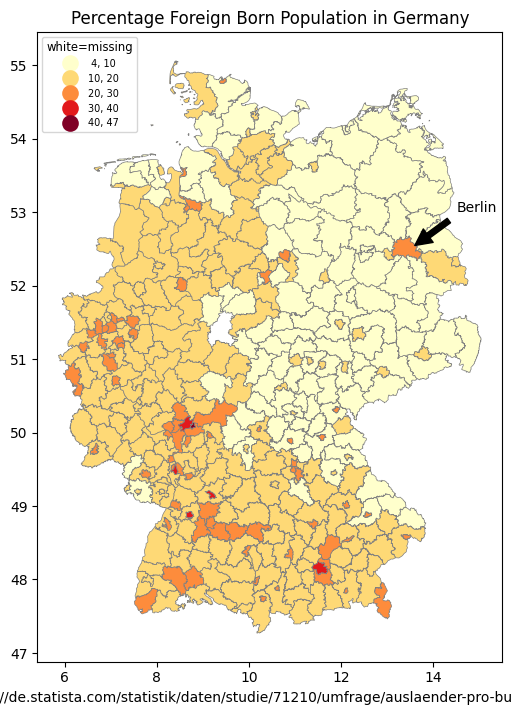

In [ ]:
#code for arrow from https://colab.research.google.com/github/theaok/vis/blob/main/all.ipynb#scrollTo=mMgE5rM79Gh0
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_percentage_final.plot(ax=ax,column='percentage foreign born',legend=True,cmap='YlOrRd',
          scheme="user_defined", classification_kwds={'bins':[10, 20, 30, 40]},k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
#aok: make fontrs smaller
leg1 = ax.get_legend()
leg1.set_title('''white=missing''')

ax.title.set_text("Percentage Foreign Born Population in Germany")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')
ax.annotate('Berlin', xy=(13.5, 52.5), xytext=(14.5, 53), #put arrow
            arrowprops=dict(facecolor='black', lw=1,shrink=.1))

#AFD Votes Revised

In [ ]:
#Shapefile of constituencies from https://www.bundeswahlleiterin.de/bundestagswahlen/2017/wahlkreiseinteilung/downloads.html
! wget -q -O germany_votes.zip https://docs.google.com/uc?id=1g6ZTdJGthLUkgvpLCSwYfOgEhT1EUdO8&export=download

zip_ref = zipfile.ZipFile('germany_votes.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger_votes=gpd.read_file('Geometrie_Wahlkreise_19DBT_VG250.shp')

<Axes: >

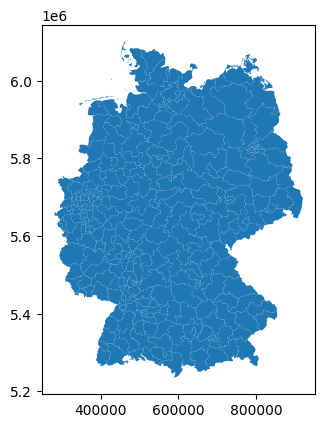

In [ ]:
ger_votes.plot()

In [ ]:
ger_votes['WKR_NR']

,WKR_NR
0,1
1,2
2,3
3,4
4,5
...,...
294,295
295,296
296,297
297,298


In [ ]:
#importing election results of last general election in 2021 from https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html
ger_er=pd.read_excel('https://docs.google.com/uc?id=1kGL6CIsLTWvtCXTKGyI7XI_S1SYSuGYG&export=download')

In [ ]:
ger_er.head(5)

,Bundestagswahl 2021 (Wiederholung in Teilen Berlins),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210
0,Amtliches Endergebnis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
2,NaN,NaN,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,...,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN
3,NaN,NaN,NaN,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,...,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode
4,1,Flensburg – Schleswig,1,231536,228471,231536,228471,180112,171914,180112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,843


In [ ]:
#making row 1 the titles of the columns and dropping row 0
ger_results=ger_er.drop(0)
ger_results.columns = ger_results.iloc[0]

In [ ]:
ger_results.head(5)

1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
1,Nr,Gebiet,gehört zu,Wahlberechtigte,NaN,NaN,NaN,Wählende,NaN,NaN,...,NaN,NaN,Thüringer Heimatpartei,NaN,NaN,NaN,Übrige,NaN,NaN,NaN
2,NaN,NaN,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,...,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN,Erststimmen,NaN,Zweitstimmen,NaN
3,NaN,NaN,NaN,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,...,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode,Endgültig,Vorperiode
4,1,Flensburg – Schleswig,1,231536,228471,231536,228471,180112,171914,180112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755,NaN,843
5,2,Nordfriesland – Dithmarschen Nord,1,188267,186568,188267,186568,145387,139194,145387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,430


In [ ]:
ger_afd=ger_results[['Nr','Gebiet','Alternative für Deutschland']]

In [ ]:
ger_afd2=ger_afd.drop(index=1).drop(index=2).drop(index=3)

In [ ]:
#dataset lists constituencies divided by state and ends each list with the name of the state
#all 16 state names are listed after the second duplicate of 1-16 in the 'Nr' column
#code from ChatGPT

duplicates = ger_afd2[ger_afd2.duplicated('Nr', keep='first')]

In [ ]:
duplicates

1,Nr,Gebiet,Alternative für Deutschland
15,1,Schleswig-Holstein,113641
23,13,Mecklenburg-Vorpommern,169977
24,NaN,NaN,NaN
31,2,Hamburg,49828
32,NaN,NaN,NaN
63,3,Niedersachsen,292032
64,NaN,NaN,NaN
67,4,Bremen,21565
68,NaN,NaN,NaN
79,12,Brandenburg,279978


In [ ]:
#to get rid the state names from the list, I am dropping the second versions of all duplicates
#code from ChatGPT
ger_afd_3 = ger_afd2.drop_duplicates('Nr', keep='first')

In [ ]:
ger_afd_3.head(15)

1,Nr,Gebiet,Alternative für Deutschland
4,1,Flensburg – Schleswig,9768
5,2,Nordfriesland – Dithmarschen Nord,8274
6,3,Steinburg – Dithmarschen Süd,10429
7,4,Rendsburg-Eckernförde,10200
8,5,Kiel,7147
9,6,Plön – Neumünster,9404
10,7,Pinneberg,12141
11,8,Segeberg – Stormarn-Mitte,14040
12,9,Ostholstein – Stormarn-Nord,9647
13,10,Herzogtum Lauenburg – Stormarn-Süd,14053


In [ ]:
ger_afd4 = ger_afd_3.rename(columns={'Nr': 'WKR_NR'})

In [ ]:
ger_afd4['Alternative für Deutschland'] = pd.to_numeric(ger_afd4['Alternative für Deutschland'], errors='coerce')

In [ ]:
ger_afd4

1,WKR_NR,Gebiet,Alternative für Deutschland
4,1,Flensburg – Schleswig,9768.0
5,2,Nordfriesland – Dithmarschen Nord,8274.0
6,3,Steinburg – Dithmarschen Süd,10429.0
7,4,Rendsburg-Eckernförde,10200.0
8,5,Kiel,7147.0
...,...,...,...
326,295,Zollernalb – Sigmaringen,15554.0
329,296,Saarbrücken,12569.0
330,297,Saarlouis,15111.0
331,298,St. Wendel,12346.0


In [ ]:
ger_afd5 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='outer',indicator=True)
ger_afd5[['WKR_NR','Gebiet','Alternative für Deutschland','_merge']]

ger_afd_2021 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='inner',indicator=False)

,WKR_NR,Gebiet,Alternative für Deutschland,_merge
0,1,Flensburg – Schleswig,9768.0,both
1,2,Nordfriesland – Dithmarschen Nord,8274.0,both
2,3,Steinburg – Dithmarschen Süd,10429.0,both
3,4,Rendsburg-Eckernförde,10200.0,both
4,5,Kiel,7147.0,both
...,...,...,...,...
295,296,Saarbrücken,12569.0,both
296,297,Saarlouis,15111.0,both
297,298,St. Wendel,12346.0,both
298,299,Homburg,16210.0,both


In [ ]:
type(ger_afd_2021)

In [ ]:
gdf = gpd.GeoDataFrame(ger_afd_2021)

<Axes: >

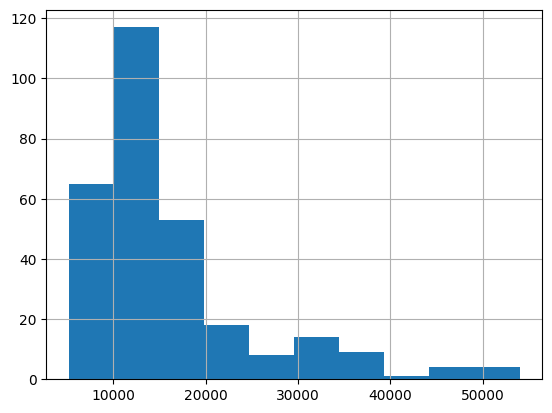

In [ ]:
ger_afd4['Alternative für Deutschland'].hist(bins=10)

The histogram for this data is also skewed to the right with the highest concentration of votes for the AFD between 10,000 and 20,000. I identified three main classes that the distribution shows, 0-20,000, 20,000-40,000, and 40,000 to 60,000. To represent these classes on the map, I chose equal intervals.

<Axes: >

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html')

Text(890000, 14.5, 'Berlin')

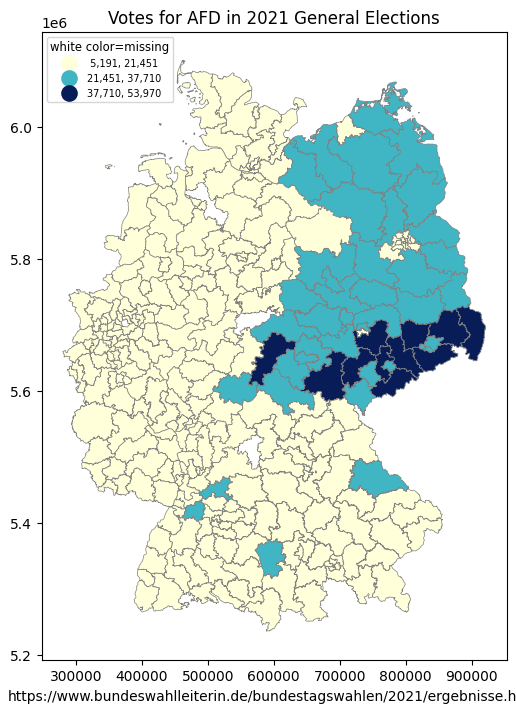

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland',legend=True,cmap='YlGnBu',
                   scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Votes for AFD in 2021 General Elections")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html''')

#Berlin Foreign Born Population

In [7]:
#Shapefile of Berlin from https://hub.arcgis.com/datasets/esri-de-content::bezirke-berlin/about
! wget -q -O berlin.zip https://docs.google.com/uc?id=1N7YjXUVVv1-a5G69lQ4ioxMwcDvgCn3t&export=download

zip_ref = zipfile.ZipFile('berlin.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ber0=gpd.read_file('Berlin_Bezirke.shp')

<Axes: >

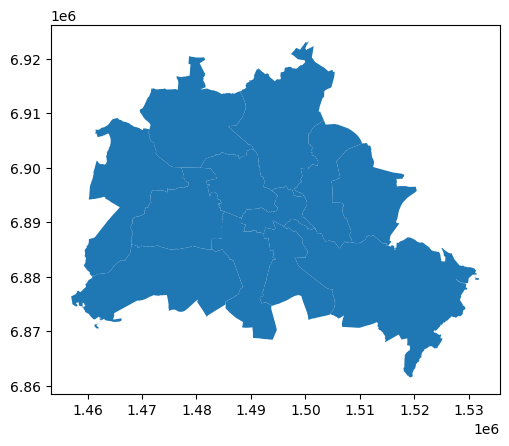

In [15]:
ber0.plot()

In [16]:
#importing data on foreign born population in Berlin from https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/
berfb=pd.read_excel('https://docs.google.com/uc?id=1UIpvSj5-CwQHJVkxhfSCEDBlJdvHPGw_&export=download')

In [17]:
#importing data on berlin total population from https://de.statista.com/statistik/daten/studie/1109841/umfrage/einwohnerzahl-bezirke-berlin/
berpop=pd.read_excel('https://docs.google.com/uc?id=1tlVbOworGPcjJCKMP7UK_3y9S_KKHRiX&export=download')

In [ ]:
berfb.head(2)

,Bezirk,Ausländer
0,Mitte,148409
1,Neukölln,93045


In [ ]:
berpop.head(2)

,Bezirk,Einwohnerzahl
0,Pankow,424307
1,Mitte,397134


In [18]:
merged_berpop = pd.merge(berfb, berpop, on='Bezirk')

In [ ]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl
0,Mitte,148409,397134
1,Neukölln,93045,330017


In [19]:
merged_berpop['Ausländer'].astype(float)
merged_berpop['Einwohnerzahl'].astype(float)


,Ausländer
0,148409.0
1,93045.0
2,81506.0
3,92071.0
4,89525.0
5,66954.0
6,59817.0
7,55123.0
8,81457.0
9,75946.0


,Einwohnerzahl
0,397134.0
1,330017.0
2,355868.0
3,343081.0
4,293454.0
5,257091.0
6,268792.0
7,310446.0
8,424307.0
9,311881.0


In [20]:
merged_berpop['Percentage Foreign Born']=(merged_berpop['Ausländer'] / merged_berpop['Einwohnerzahl']) * 100

In [ ]:
merged_berpop.head(2)

,Bezirk,Ausländer,Einwohnerzahl,Percentage Foreign Born
0,Mitte,148409,397134,37.370006
1,Neukölln,93045,330017,28.194002


In [21]:
merged_berpop['Percentage Foreign Born']=merged_berpop['Percentage Foreign Born'].astype(int)

In [ ]:
ber0.columns

Index(['Gemeinde_n', 'Gemeinde_s', 'Land_name', 'Land_schlu', 'Schluessel',
       'geometry'],
      dtype='object')

In [22]:
ber0['Gemeinde_n']

,Gemeinde_n
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [23]:
ber0.rename(columns={'Gemeinde_n': 'Bezirk'}, inplace=True)

In [ ]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [24]:
berfb_map = pd.merge(ber0, merged_berpop, on='Bezirk',how='outer',indicator=True)
berfb_map[['Bezirk','Percentage Foreign Born','_merge']]

berfb_map2 = pd.merge(ber0, merged_berpop, on='Bezirk',how='inner',indicator=False)

,Bezirk,Percentage Foreign Born,_merge
0,Charlottenburg-Wilmersdorf,26,both
1,Friedrichshain-Kreuzberg,30,both
2,Lichtenberg,24,both
3,Marzahn-Hellersdorf,18,both
4,Mitte,37,both
5,Neukölln,28,both
6,Pankow,19,both
7,Reinickendorf,22,both
8,Spandau,26,both
9,Steglitz-Zehlendorf,17,both


<Axes: >

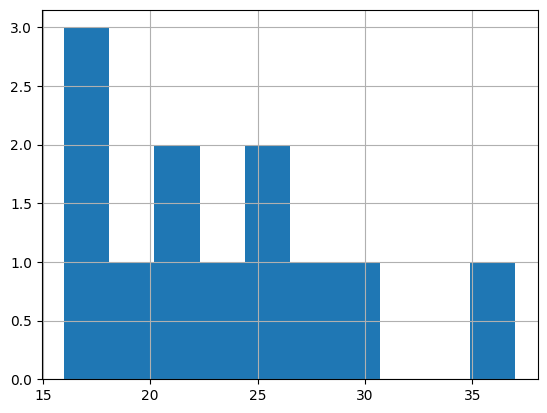

In [25]:
merged_berpop['Percentage Foreign Born'].hist(bins=10)

The histogram shows that the percentage of foreign born population in the different districts of Berlin is relatively evenly destributed between 15 and 30 percent, with one district having more than 35% foreign born population. To show this distribution accurately in my map, I chose to to manually define 4 classes with cut offs at 20%, 25%, and 30%. This calssification shows each spike in the histogram in a seperate class as well as the one district that has over 35%.

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

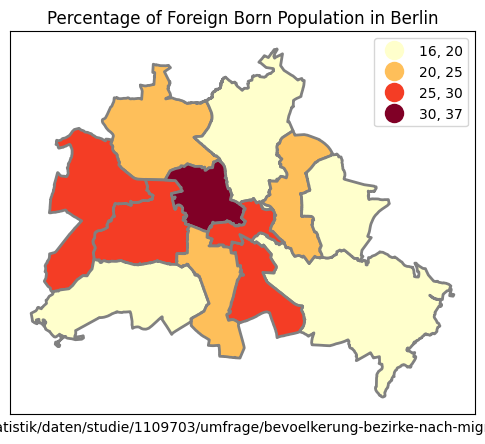

In [26]:
fig, ax = plt.subplots(1, figsize=(6,10))
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='user_defined', classification_kwds={'bins':[20, 25, 30]}, k=4, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')

#Housing Projects Berlin

In [8]:
housing_projects=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/Hausprojekte_Berlin.xlsx')

In [9]:
housing_projects.head(25)

,Housing Project,Address
0,Bödi 9,Bödikerstr. 9 10245 Berlin
1,Chuzpe Plietsch,Karl-Marx-Str. 282 12057 Berlin
2,Grüni,Gruenberger Str. 73 10245 Berlin
3,H48,"Hermannstraße 38, 12049 Berlin"
4,Hausprojekt Burge,"Burgemeisterstraße 17, 12099 Berlin, Deutschland"
5,Hausprojekt M29,Malmöer Str. 29 10439 Berlin
6,Hausprojekt Rahnsdorf,Püttbergeweg 77 12589 Berlin
7,Jagow 15,Jagowstr. 15 13585 Berlin
8,Jetty,Röbellweg 14 13125 Berlin
9,Kastanie,Kastanienallee 85 10435 Berlin


In [10]:
from geopandas.tools import geocode

In [11]:
locations = geocode(housing_projects['Address'], provider='nominatim', user_agent='hbeck',timeout=2)
locations.head(5)

,geometry,address
0,POINT (13.46374 52.49999),"9, Bödikerstraße, Rudolfkiez, Friedrichshain, ..."
1,POINT (13.44374 52.46384),"282, Karl-Marx-Straße, Neukölln, Berlin, 12057..."
2,POINT (13.45953 52.51145),"Stadtteilladen Zielona Góra, 73, Grünberger St..."
3,POINT (13.42883 52.47206),"Hermannstraße, Rollbergsiedlung, Neukölln, Ber..."
4,POINT (13.37973 52.4575),"17, Burgemeisterstraße, Tempelhof, Tempelhof-S..."


<Axes: >

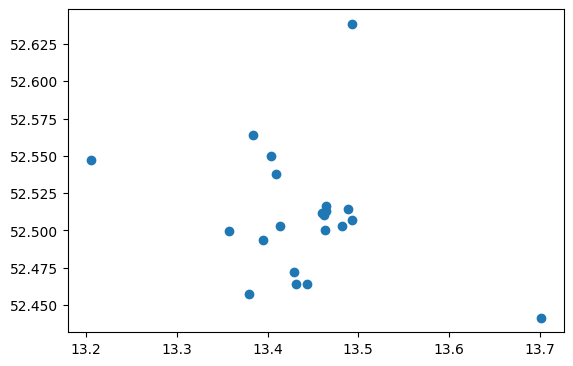

In [12]:
locations.plot()

<Axes: >

[]

[]

Text(0.5, 23.52222222222222, 'https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/')

<Axes: title={'center': 'Percentage of Foreign Born Population and Housing Projects'}, xlabel='https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/'>

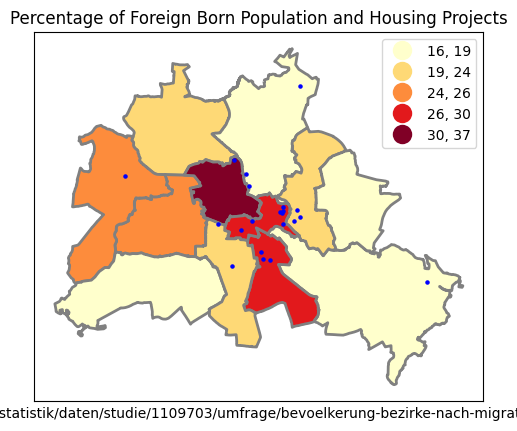

In [27]:
#line 1 and two adapted from chatGPT suggestion on how to make two maps I am overlaying the same size
if berfb_map2.crs != locations.crs:
    berhp = locations.to_crs(berfb_map2.crs)

fig, ax = plt.subplots()
berfb_map2.plot(ax=ax,column='Percentage Foreign Born',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Percentage of Foreign Born Population and Housing Projects")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/1109703/umfrage/bevoelkerung-bezirke-nach-migrationshintergrund-berlin/''')
berhp.plot(ax=ax, color='blue', markersize=5)

#Airbnbs

In [28]:
#data from https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021
airbnb_ber=pd.read_csv('https://raw.githubusercontent.com/hbeck118/GIS/main/airbnb_berlin.csv')

In [29]:
airbnb_ber.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285


In [30]:
airbnb_group=airbnb_ber.groupby('neighbourhood_group').size()

<Axes: xlabel='neighbourhood_group'>

Text(0.5, 0, 'District')

Text(0, 0.5, 'Number of Airbnbs')

Text(0.5, 1.0, 'Airbnbs in Berlin')

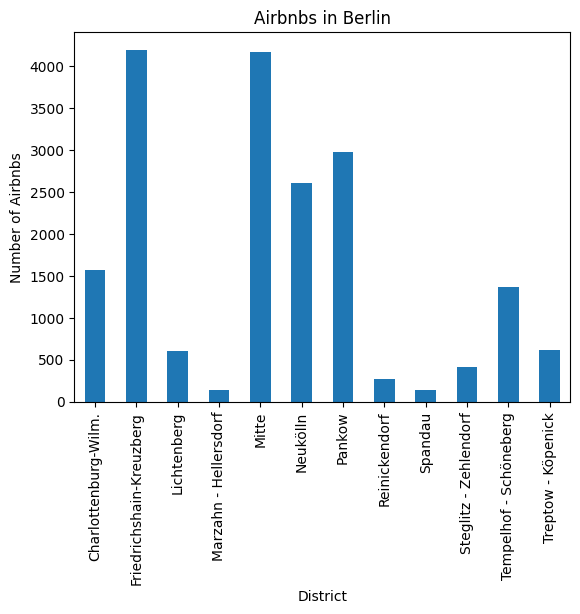

In [ ]:
airbnb_group.plot(kind='bar')

# Add labels
plt.xlabel('District')
plt.ylabel('Number of Airbnbs')
plt.title('Airbnbs in Berlin')

In [ ]:
airbnb_group

,0
neighbourhood_group,
Charlottenburg-Wilm.,1567
Friedrichshain-Kreuzberg,4197
Lichtenberg,612
Marzahn - Hellersdorf,142
Mitte,4173
Neukölln,2608
Pankow,2981
Reinickendorf,271
Spandau,138


In [31]:
#code to access neighborhood group column instead of having it as the index from gemini AI
airbnb_group = airbnb_group.reset_index().rename(columns={0: 'count'})

In [32]:
airbnb_group['Bezirk'] = airbnb_group['neighbourhood_group'].str.strip().str.replace(' ', '')
airbnb_group['Bezirk'].replace('Charlottenburg-Wilm.', 'Charlottenburg-Wilmersdorf', inplace=True)

<ipython-input-32-4856de1a35da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_group['Bezirk'].replace('Charlottenburg-Wilm.', 'Charlottenburg-Wilmersdorf', inplace=True)


In [33]:
airbnb_group['count'] = airbnb_group['count'].astype(float)

In [34]:
ber0['Bezirk']

,Bezirk
0,Reinickendorf
1,Charlottenburg-Wilmersdorf
2,Treptow-Köpenick
3,Pankow
4,Neukölln
5,Lichtenberg
6,Marzahn-Hellersdorf
7,Spandau
8,Steglitz-Zehlendorf
9,Mitte


In [35]:
airbnb_map = pd.merge(ber0, airbnb_group, on='Bezirk',how='outer',indicator=True)
airbnb_map[['Bezirk','count','_merge']]

airbnb_map1 = pd.merge(ber0, airbnb_group, on='Bezirk',how='inner',indicator=False)

,Bezirk,count,_merge
0,Charlottenburg-Wilmersdorf,1567.0,both
1,Friedrichshain-Kreuzberg,4197.0,both
2,Lichtenberg,612.0,both
3,Marzahn-Hellersdorf,142.0,both
4,Mitte,4173.0,both
5,Neukölln,2608.0,both
6,Pankow,2981.0,both
7,Reinickendorf,271.0,both
8,Spandau,138.0,both
9,Steglitz-Zehlendorf,415.0,both


array([[<Axes: title={'center': 'count'}>]], dtype=object)

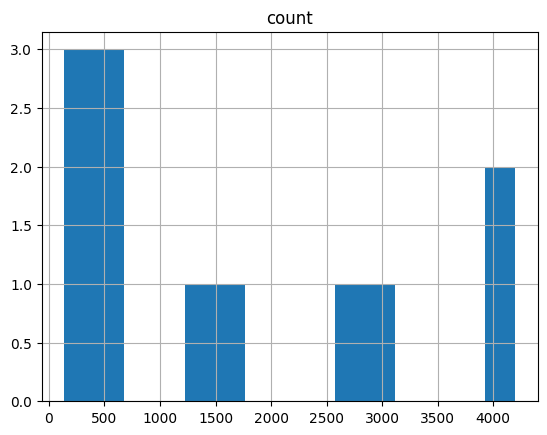

In [36]:
airbnb_group.hist(bins=15)

This histogram very clearly shows four separate classes, which are represented by manually defining the bins for the map with cut-off points at 1000, 2000, and 3500.

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021')

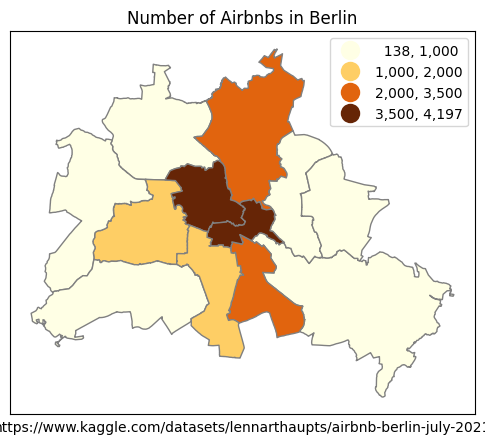

In [37]:
fig, ax = plt.subplots(1, figsize=(6,10))
airbnb_map1.plot(ax=ax,column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Number of Airbnbs in Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021')

<Axes: title={'center': 'Number of Airbnbs in Berlin and Housing Projects'}, xlabel='https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021'>

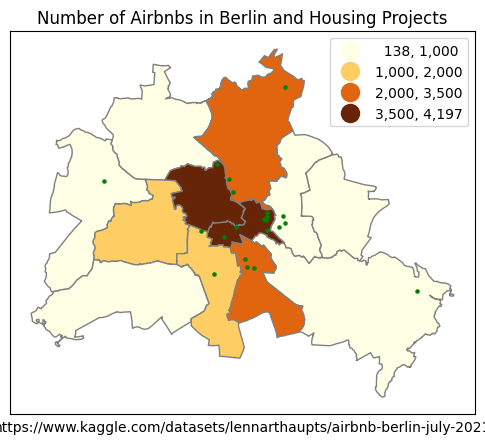

In [38]:
fig, ax = plt.subplots(1, figsize=(6,10))
airbnb_map1.plot(ax=ax,column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Number of Airbnbs in Berlin and Housing Projects")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')
berhp.plot(ax=ax, color='green', markersize=5)


#Average Rent Berlin

In [39]:
av_rent=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/Average_Rent_Berlin.xlsx')

In [ ]:
av_rent.head(2)

,Bezirk,Average Rent/Sqaure Meter
0,Mitte,8.30
1,Friedrichshain-Kreuzberg,8.19


In [ ]:
av_rent.dtypes

,0
Bezirk,object
Average Rent/Sqaure Meter,float64


In [40]:
av_rent_ber = pd.merge(ber0, av_rent, on='Bezirk',how='outer',indicator=True)
av_rent_ber[['Bezirk','Average Rent/Sqaure Meter ','_merge']]

av_rent_map = pd.merge(ber0, av_rent, on='Bezirk',how='inner',indicator=False)

,Bezirk,Average Rent/Sqaure Meter,_merge
0,Charlottenburg-Wilmersdorf,8.43,both
1,Friedrichshain-Kreuzberg,8.19,both
2,Lichtenberg,7.15,both
3,Marzahn-Hellersdorf,6.29,both
4,Mitte,8.30,both
5,Neukölln,7.40,both
6,Pankow,8.05,both
7,Reinickendorf,7.13,both
8,Spandau,7.15,both
9,Steglitz-Zehlendorf,8.01,both


array([[<Axes: title={'center': 'Average Rent/Sqaure Meter '}>]],
      dtype=object)

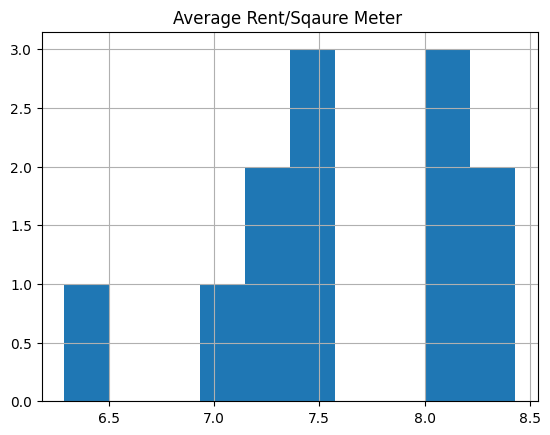

In [41]:
av_rent_map.hist()

This histogram clearly shows that the average rent/square meter is distributed into three different groups, which I show on the map by manually defining the bins with cut-off points at 6.6 and 7.7.

<Axes: >

[]

[]

Text(0.5, 274.24344253431104, 'https://www.statistik-berlin-brandenburg.de/zensus22')

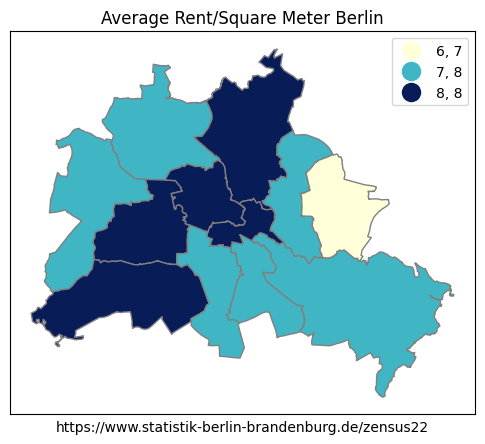

In [42]:
fig, ax = plt.subplots(1, figsize=(6,10))
av_rent_map.plot(ax=ax,column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Average Rent/Square Meter Berlin")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')


<Axes: >

[]

[]

Text(0.5, 23.52222222222222, 'https://www.statistik-berlin-brandenburg.de/zensus22')

<Axes: title={'center': 'Average Rent/Square Meter Berlin and Alternative Housing Projects'}, xlabel='https://www.statistik-berlin-brandenburg.de/zensus22'>

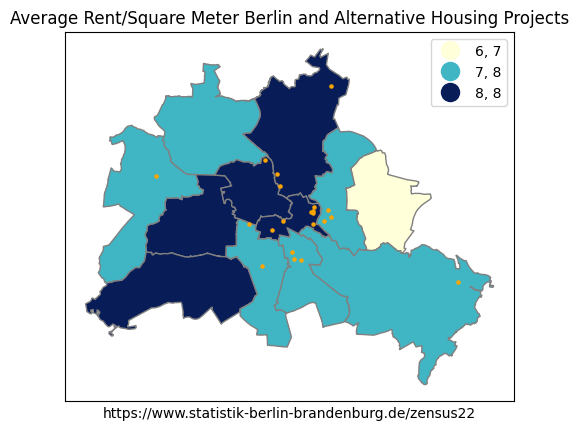

In [43]:
if av_rent_map.crs != locations.crs:
    berhp = locations.to_crs(av_rent_map.crs)

fig, ax = plt.subplots()
av_rent_map.plot(ax=ax,column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
leg1 = ax.get_legend()
ax.title.set_text("Average Rent/Square Meter Berlin and Alternative Housing Projects")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
berhp.plot(ax=ax, color='orange', markersize=5)


#Side by side

<Axes: >

[]

[]

<Axes: title={'center': 'rent/square m and housing projects'}>

<Axes: >

[]

[]

<Axes: title={'center': 'airbnbs and housing projects'}>

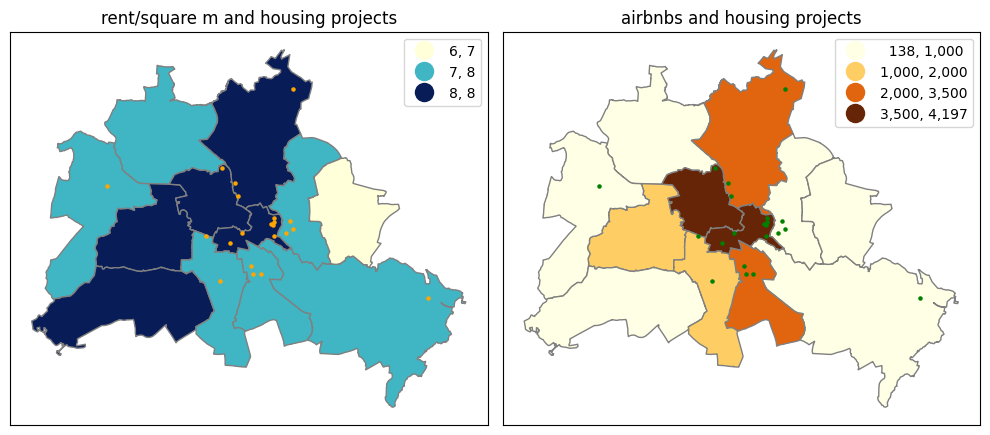

In [44]:
if av_rent_map.crs != locations.crs:
    berhp = locations.to_crs(av_rent_map.crs)
fig, axs = plt.subplots(1, 2, figsize=(10,10),sharey=True, tight_layout=True)
av_rent_map.plot(ax=axs[0],column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[0].title.set_text("rent/square m and housing projects")
axs[0].set_xticks([]); axs[0].set_yticks([])
#axs[0].set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
berhp.plot(ax=axs[0], color='orange', markersize=5)

airbnb_map1.plot(ax=axs[1],column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[1].title.set_text("airbnbs and housing projects")
axs[1].set_xticks([]); axs[1].set_yticks([])
#axs[2].set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')
berhp.plot(ax=axs[1], color='green', markersize=5)



#Adding Labels

<Axes: >

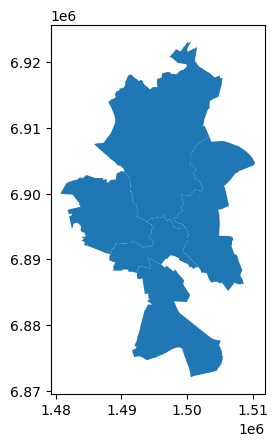

In [46]:
berlabel = ber0[ber0['Bezirk'].isin(['Mitte', 'Friedrichshain-Kreuzberg', 'Neukölln','Lichtenberg','Pankow'])]
berlabel.plot()

<Axes: >

[]

[]

<Axes: title={'center': 'rent/square m and housing projects'}>

Text(1496162.3723469207, 6908841.575690903, 'Pankow')

Text(1497799.1533281857, 6880278.186610839, 'Neukölln')

Text(1503900.1042540602, 6897435.382007128, 'Lichtenberg')

Text(1487884.9801694562, 6897057.381012389, 'Mitte')

Text(1494825.4660031418, 6891740.136154433, 'Friedrichshain-Kreuzberg')

<Axes: >

[]

[]

<Axes: title={'center': 'airbnbs and housing projects'}>

Text(1496162.3723469207, 6908841.575690903, 'Pankow')

Text(1497799.1533281857, 6880278.186610839, 'Neukölln')

Text(1503900.1042540602, 6897435.382007128, 'Lichtenberg')

Text(1487884.9801694562, 6897057.381012389, 'Mitte')

Text(1494825.4660031418, 6891740.136154433, 'Friedrichshain-Kreuzberg')

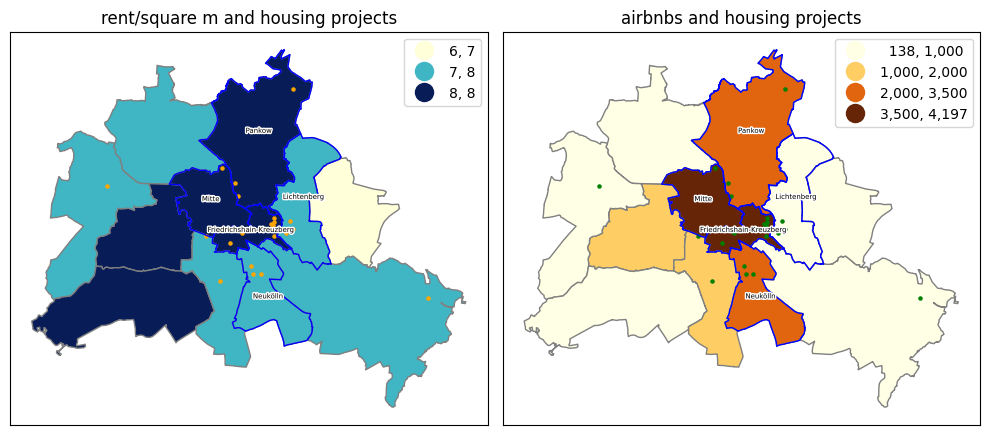

In [47]:
if av_rent_map.crs != locations.crs:
    berhp = locations.to_crs(av_rent_map.crs)
fig, axs = plt.subplots(1, 2, figsize=(10,10),sharey=True, tight_layout=True)
av_rent_map.plot(ax=axs[0],column='Average Rent/Sqaure Meter ',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[6.6, 7.7]}, k=3, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[0].title.set_text("rent/square m and housing projects")
axs[0].set_xticks([]); axs[0].set_yticks([])
#axs[0].set_xlabel('''https://www.statistik-berlin-brandenburg.de/zensus22''')
berhp.plot(ax=axs[0], color='orange', markersize=5)
from matplotlib.patheffects import withStroke
ax=berlabel.plot(ax=axs[0],edgecolor='blue',linewidth=1, facecolor="none")
centroids = berlabel.geometry.centroid
for x, y, label in zip(centroids.x, centroids.y, berlabel.Bezirk):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=2, foreground='white')])


airbnb_map1.plot(ax=axs[1],column='count',legend=True,cmap='YlOrBr',
          scheme="user_defined", classification_kwds={'bins':[1000, 2000, 3500]}, k=4, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper right','markerscale':1.4},
          missing_kwds={'color': 'lightgrey', 'edgecolor': 'grey'})
axs[1].title.set_text("airbnbs and housing projects")
axs[1].set_xticks([]); axs[1].set_yticks([])
#axs[2].set_xlabel('''https://www.kaggle.com/datasets/lennarthaupts/airbnb-berlin-july-2021''')
berhp.plot(ax=axs[1], color='green', markersize=5)
from matplotlib.patheffects import withStroke
ax=berlabel.plot(ax=axs[1],edgecolor='blue',linewidth=1, facecolor="none")
centroids = berlabel.geometry.centroid
for x, y, label in zip(centroids.x, centroids.y, berlabel.Bezirk):
    ax.annotate(label, xy=(x, y),horizontalalignment='center',
    fontsize=5,color='black', #fontweight='bold',
    path_effects=[withStroke(linewidth=2, foreground='white')])

#Interpretation of Maps

Because Berlin strongly differs from areas around it both regarding the percentage of foreign born people living there and regarding the amount of people who vote for the far right party AFD, I decided to focus more closely on Berlin to understand what might differentiate it from the areas around it.

One issue that is very relevlant in political discussions as well as any discussions surrounding social welfare is housing. I chose to map two factors related to housing costs in Berlin, the average rent per square meter, and the number of Airbnbs per district. I chose to include Airbnbs, as this type of short term housing rental is often considered to be harmful to rent prices for citizens and Berlin has implemeted various restrictions on Airbnbs throughout the past few years.

Using these two indicators to identify the areas of Berlin where it is especially expensive to rent, I overlayed both maps with a map that geoplots the locations of berlin housing projects. These housing projects usually aim to comunally own a certain living space, working towards autonomy from the housing market and affordable prices. The locations of these housing projects overlap with the areas that are most expensive in Berlin.

This phenomenon might suggest that there is strong support for community lead alternative projects as a response to social inequality in places such as Berlin. Such a mindset might be part of the reason why Berlin defies the first law of geography and stands out as an island among its surrounding areas in terms of support of the far right party AFD. Instead of listening to the AFDs propaganda blaming immigrnat populations for most social issues in Germany, citizens of Berlin are exposed to alternative responses to social inequality.

To further investigate this idea, I could map the same factors in different cities and compare them to Berlin. It would also be interesting to investigate other issues of social issues in Berlin or map the distribution of AFd votes within Berlin.